In [2]:
import pandas as pd
import scipy
import numpy as np

In [23]:
df = pd.read_csv("F22ProcessedData.csv")
print(df.columns)

df = pd.read_csv("S23ProcessedData.csv")
print(df.columns)

df = pd.read_csv("F23ProcessedData.csv")
print(df.columns)

df = pd.read_csv("S24ProcessedData.csv")
print(df.columns)

Index(['Unnamed: 0', 'R1: Excitement', 'SWE R2 I1: Deliverable',
       'SWE R2 I1: Technical Communication', 'SWE R2 I1: Learning Ability',
       'SWE R2 I1: Teamwork & Communication', 'SWE R2 I1: Overall',
       'SWE R2 I2: Deliverable', 'SWE R2 I2: Technical Communication',
       'SWE R2 I2: Learning Ability', 'SWE R2 I2: Teamwork & Communication',
       'SWE R2 I2: Overall', 'Accepted?', 'Duration (Semesters)',
       'Current Member?'],
      dtype='object')
Index(['Unnamed: 0', 'R1: Excitement', 'SWE R2 I1: Deliverable',
       'SWE R2 I1: Technical Communication', 'SWE R2 I1: Learning Ability',
       'SWE R2 I1: Teamwork & Communication', 'SWE R2 I1: Overall',
       'SWE R2 I2: Deliverable', 'SWE R2 I2: Technical Communication',
       'SWE R2 I2: Learning Ability', 'SWE R2 I2: Teamwork & Communication',
       'SWE R2 I2: Overall', 'SWE R2 Status', 'Accepted?',
       'Duration (Semesters)', 'Current Member?'],
      dtype='object')
Index(['Unnamed: 0', 'R1: Excitement', 

## Calculate Correlation Between Interviewing Scores and Accepted

In [3]:
def acceptedAndDurationCorr(file_name):
    df = pd.read_csv(file_name)

    # List of features
    columns_interview = []
    for column_i in list(df.columns)[1:]:
        columns_interview.append(column_i)
        if column_i == 'SWE R2 I2: Overall' or column_i == 'SWE R2 Average Score':
            break
    
    # Found appropriate correlation measure here: https://www.ce.memphis.edu/7012/L17_CategoricalVariableAssociation.pdf 
    
    corr_list = []
    for column_i in columns_interview:
        corr_list.append((
            column_i, 
            scipy.stats.pointbiserialr(np.array(df[column_i]), np.array(df['Accepted?'])),
            scipy.stats.pearsonr(np.array(df[column_i]), np.array(df['Duration (Semesters)'])),
        ))

    print("TOP 5 R Accepted Values")
    corr_list.sort(key = lambda item : item[1].statistic)
    
    for key, val, val2  in corr_list[-5:]:
        print(key, val.statistic)

    print("TOP 5 R Duration Values")
    corr_list.sort(key = lambda item : item[2].statistic)
    
    for key, val, val2 in corr_list[-5:]:
        print(key, val2.statistic)

    print()

   

In [4]:
for file_i in ["F22ProcessedData.csv", "S23ProcessedData.csv", "F23ProcessedData.csv", "S24ProcessedData.csv"]:
    print(file_i)
    acceptedAndDurationCorr(file_name = file_i)
    

F22ProcessedData.csv
TOP 5 R Accepted Values
SWE R2 I1: Deliverable 0.5379823748652963
SWE R2 I1: Teamwork & Communication 0.548833100977617
SWE R2 I1: Learning Ability 0.5695210740924566
SWE R2 I1: Technical Communication 0.6058791811846899
SWE R2 I1: Overall 0.6422802539779227
TOP 5 R Duration Values
SWE R2 I1: Deliverable 0.47523317704262996
SWE R2 I1: Learning Ability 0.49340944747388493
SWE R2 I1: Teamwork & Communication 0.5267490804694394
SWE R2 I1: Technical Communication 0.575128035872991
SWE R2 I1: Overall 0.611803405523612

S23ProcessedData.csv
TOP 5 R Accepted Values
SWE R2 I2: Learning Ability 0.5034816842488848
SWE R2 I2: Overall 0.5069288611926808
SWE R2 I2: Teamwork & Communication 0.5200911513951968
SWE R2 I1: Overall 0.5271935748519105
SWE R2 I2: Deliverable 0.5327694141696595
TOP 5 R Duration Values
SWE R2 I2: Learning Ability 0.42035141025478173
SWE R2 I2: Deliverable 0.43092853926630714
SWE R2 I2: Overall 0.4332510240032247
SWE R2 I1: Overall 0.43789953035615203
SW

## Plot Columns Across Years

### Look at columns in common

In [32]:
from operator import and_, or_
from functools import reduce

columns_list = []
columns_total = set()
for file_name in ["F22ProcessedData.csv", "S23ProcessedData.csv", "F23ProcessedData.csv", "S24ProcessedData.csv"]:
    df_i = pd.read_csv(file_name)
    columns_i = list(df_i.columns)

    columns_list.append(set(columns_i))
    columns_total.update(columns_i)

print("In Common across years:", set(reduce(and_, columns_list)) )
print("Total:", columns_total)
print("Not in every year:", columns_total - set(reduce(and_, columns_list)))

In Common across years: {'SWE R2 I2: Technical Communication', 'Duration (Semesters)', 'R1: Excitement', 'Current Member?', 'Unnamed: 0', 'SWE R2 I1: Deliverable', 'SWE R2 I1: Learning Ability', 'SWE R2 I2: Overall', 'SWE R2 I1: Technical Communication', 'SWE R2 I2: Learning Ability', 'SWE R2 I2: Deliverable', 'Accepted?', 'SWE R2 I1: Overall'}
Total: {'SWE R2 I2: Teamwork & Communication', 'SWE Performance Score', 'Current Member?', 'R1 Average Score', 'SWE R2 I1: Technical Communication', 'SWE R2 Average Score', 'Accepted?', 'SWE R2 I1: Overall', 'Duration (Semesters)', 'SWE R2 I1: Passion/Engagement.1', 'SWE R2 I1: Teamwork & Communication', 'SWE R2 I2: Overall', 'SWE R2 Status', 'SWE R2 I2: Learning Ability', 'SWE R2 I2: Technical Communication', 'R1: Excitement', 'Unnamed: 0', 'SWE R2 I1: Deliverable', 'SWE R2 I1: Learning Ability', 'R1: Overall', 'SWE R2 I1: Passion/Engagement', 'SWE R2 I2: Deliverable'}
Not in every year: {'SWE R2 I2: Teamwork & Communication', 'SWE Performance 

### Combine csvs

In [62]:
data = []

for file_name in ["F22ProcessedData.csv", "S23ProcessedData.csv", "F23ProcessedData.csv", "S24ProcessedData.csv"]:
    df_i = pd.read_csv(file_name, index_col=False)
    df_i = df_i.drop('Unnamed: 0', axis=1)

    df_i = df_i.assign(season=file_name[:3]) 

    data.append(df_i)

frame = pd.concat(data, ignore_index = True, sort=False)

assert set(frame.columns) == (columns_total.union(set(['season'])) - set(['Unnamed: 0']))

### Colored Scatterplot

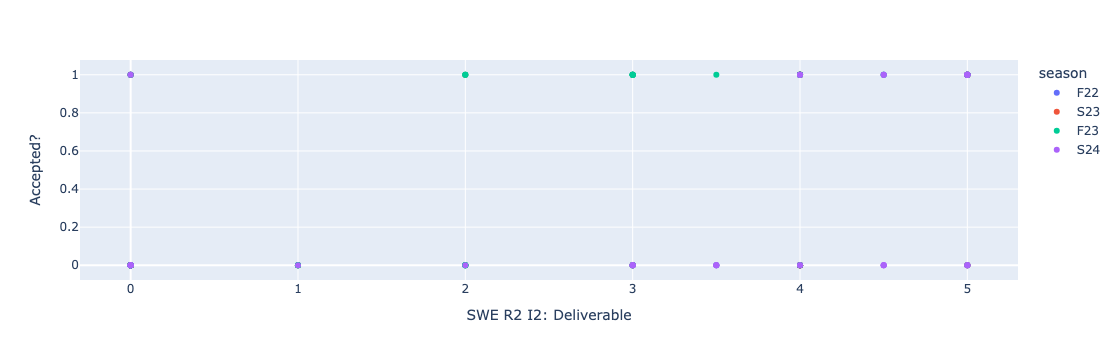

In [65]:
fig = px.scatter(frame, x="SWE R2 I2: Deliverable", y="Accepted?", color="season")
fig.show()